In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import itertools # Importando itertools para generar combinaciones de columnas
# Importando la función seasonal_decompose para la descomposición de series temporales
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.patches as mpatches
from sklearn import preprocessing 

pd.options.display.max_columns = None

# Cargar datasets
cash_request_data = pd.read_csv('/kaggle/input/business-payment/extract - cash request - data analyst.csv')
fees_data = pd.read_csv('/kaggle/input/business-payment/extract - fees - data analyst - .csv')

# Convertir fechas a datetime
cash_request_data['send_at'] = pd.to_datetime(cash_request_data['send_at'], errors='coerce')
cash_request_data['cash_request_received_date'] = pd.to_datetime(cash_request_data['cash_request_received_date'], errors='coerce')
cash_request_data['created_at'] = pd.to_datetime(cash_request_data['created_at'], errors='coerce')
fees_data['created_at'] = pd.to_datetime(fees_data['created_at'], errors='coerce')

# Crear columna de periodo diario
cash_request_data['Mes_created_at_d'] = cash_request_data['created_at'].dt.to_period('D').astype(str)

# Normalizar fechas faltantes en cash_request_data
cash_request_data['cash_request_received_date'] = cash_request_data.apply(
    lambda row: row['send_at'] + pd.DateOffset(days=3)
    if pd.isna(row['cash_request_received_date']) and row['status'] == 'money_back'
    else row['cash_request_received_date'], axis=1
)

# Unir cash_request_data y fees_data usando cash_request_id
merged_data = pd.merge(cash_request_data, fees_data, left_on='id', right_on='cash_request_id', how='inner')

# Mostrar las columnas del dataset unido
display(merged_data.columns)

# Interpolar valores de amount y total_amount por día en merged_data
merged_data['Mes_created_at_d'] = merged_data['created_at_x'].dt.to_period('D').astype(str)
ratio_merged = merged_data.groupby('Mes_created_at_d')[['amount', 'total_amount']].mean().dropna()
display(ratio_merged)

display(merged_data.head())

/kaggle/input/business-payment/extract - fees - data analyst - .csv
/kaggle/input/business-payment/extract - cash request - data analyst.csv


<ipython-input-1-f790a20fe8f4>:47: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash_request_data['Mes_created_at_d'] = cash_request_data['created_at'].dt.to_period('D').astype(str)


Index(['id_x', 'amount', 'status_x', 'created_at_x', 'updated_at_x', 'user_id',
       'moderated_at', 'deleted_account_id', 'reimbursement_date',
       'cash_request_received_date', 'money_back_date', 'transfer_type',
       'send_at', 'recovery_status', 'reco_creation', 'reco_last_update',
       'Mes_created_at_d', 'id_y', 'cash_request_id', 'type', 'status_y',
       'category', 'total_amount', 'reason', 'created_at_y', 'updated_at_y',
       'paid_at', 'from_date', 'to_date', 'charge_moment'],
      dtype='object')

<ipython-input-1-f790a20fe8f4>:63: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  merged_data['Mes_created_at_d'] = merged_data['created_at_x'].dt.to_period('D').astype(str)


,amount,total_amount
Mes_created_at_d,,
2020-04-29,100.000000,5.0
2020-05-01,100.000000,5.0
2020-05-05,116.666667,5.0
2020-05-06,100.000000,5.0
2020-05-08,100.000000,5.0
...,...,...
2020-10-28,53.669623,5.0
2020-10-29,59.053892,5.0
2020-10-30,69.354167,5.0


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,id_x,amount,status_x,created_at_x,updated_at_x,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,Mes_created_at_d,id_y,cash_request_id,type,status_y,category,total_amount,reason,created_at_y,updated_at_y,paid_at,from_date,to_date,charge_moment
0,23534,25.0,money_back,2020-10-23 15:20:26.163927+00:00,2020-12-18 13:08:29.099365+00,21465.0,NaN,NaN,2020-11-10 23:51:00+00,2020-10-26 15:21:26.878525+00:00,2020-11-06 07:16:21.845479+00,instant,2020-10-23 15:21:26.878525+00:00,NaN,NaN,NaN,2020-10-23,16460,23534.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23534,2020-10-23 15:21:35.895711+00:00,2020-10-23 15:21:35.89574+00,2020-11-06 07:16:22.014422+00,NaN,NaN,after
1,2203,100.0,money_back,2020-05-27 02:26:27.615190+00:00,2020-06-09 11:25:51.72636+00,2109.0,2020-05-27 10:02:13.094467+00,NaN,2020-07-15 02:26:27+00,2020-05-29 00:00:00,2020-07-15 22:00:00+00,regular,NaT,NaN,NaN,NaN,2020-05-27,100,2203.0,postpone,accepted,NaN,5.0,Postpone Cash Request 2203,2020-06-09 11:25:52.449808+00:00,2020-10-13 14:25:00.867548+00,NaN,2020-06-15 02:26:27+00,2020-07-15 02:26:27+00,before
2,6098,100.0,active,2020-07-01 09:30:03.145410+00:00,2020-08-11 22:27:58.240406+00,23328.0,2020-07-01 16:44:53.070844+00,NaN,2020-08-03 22:00:00+00,2020-07-03 00:00:00,NaN,regular,NaT,pending,2020-08-11 22:27:55.367849+00,2020-08-11 22:27:58.255621+00,2020-07-01,3733,6098.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 6098,2020-08-13 10:58:39.634220+00:00,2020-10-13 14:25:16.660127+00,NaN,2020-08-03 22:00:00+00,2020-09-03 10:58:32.274+00,after
3,6098,100.0,active,2020-07-01 09:30:03.145410+00:00,2020-08-11 22:27:58.240406+00,23328.0,2020-07-01 16:44:53.070844+00,NaN,2020-08-03 22:00:00+00,2020-07-03 00:00:00,NaN,regular,NaT,pending,2020-08-11 22:27:55.367849+00,2020-08-11 22:27:58.255621+00,2020-07-01,3734,6098.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 6098,2020-08-13 10:58:52.603153+00:00,2020-10-13 14:25:16.661371+00,NaN,2020-08-03 22:00:00+00,2020-09-03 10:58:32.274+00,after
4,6098,100.0,active,2020-07-01 09:30:03.145410+00:00,2020-08-11 22:27:58.240406+00,23328.0,2020-07-01 16:44:53.070844+00,NaN,2020-08-03 22:00:00+00,2020-07-03 00:00:00,NaN,regular,NaT,pending,2020-08-11 22:27:55.367849+00,2020-08-11 22:27:58.255621+00,2020-07-01,3735,6098.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 6098,2020-08-13 11:00:39.879521+00:00,2020-10-13 14:25:16.662449+00,NaN,2020-08-03 22:00:00+00,2020-09-01 11:00:34.027+00,after


In [3]:
import pandas as pd

# Crear copia del dataset unido
merged_transformed = merged_data.copy()

# Verificar columnas existentes
print(merged_transformed.columns)

# Mapear estados de morosidad usando columnas reales
if 'status_x' in merged_transformed.columns:
    merged_transformed['status_x'] = merged_transformed['status_x'].fillna('null').map({
        'money_back': 1,
        'direct_debit_sent': 2,
        'direct_debit_rejected': 3,
        'transaction_declined': 4,
        'waiting_reimbursement': 5,
        'active': 6,
        'canceled': 7,
        'null': 0
    })

# Convertir timedelta a float en días si existe
if 'days_to_reimbursement' in merged_transformed.columns:
    merged_transformed['days_to_reimbursement'] = merged_transformed['days_to_reimbursement'].astype(float)

# Eliminar columnas irrelevantes o repetidas
columns_to_drop = ['send_at', 'created_at_x', 'created_at_y', 'reason']
merged_transformed = merged_transformed.drop(columns=columns_to_drop, errors='ignore')

# Mostrar el dataset transformado
print(merged_transformed.head())


Index(['id_x', 'amount', 'status_x', 'created_at_x', 'updated_at_x', 'user_id',
       'moderated_at', 'deleted_account_id', 'reimbursement_date',
       'cash_request_received_date', 'money_back_date', 'transfer_type',
       'send_at', 'recovery_status', 'reco_creation', 'reco_last_update',
       'Mes_created_at_d', 'id_y', 'cash_request_id', 'type', 'status_y',
       'category', 'total_amount', 'reason', 'created_at_y', 'updated_at_y',
       'paid_at', 'from_date', 'to_date', 'charge_moment'],
      dtype='object')
    id_x  amount  status_x                   updated_at_x  user_id  \
0  23534    25.0         1  2020-12-18 13:08:29.099365+00  21465.0   
1   2203   100.0         1   2020-06-09 11:25:51.72636+00   2109.0   
2   6098   100.0         6  2020-08-11 22:27:58.240406+00  23328.0   
3   6098   100.0         6  2020-08-11 22:27:58.240406+00  23328.0   
4   6098   100.0         6  2020-08-11 22:27:58.240406+00  23328.0   

                    moderated_at  deleted_account_id

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Crear copia del dataset transformado
scaled_data = merged_transformed.copy()

# Eliminar columnas no numéricas y convertir fechas a timestamps
for col in scaled_data.select_dtypes(include=['datetime64']).columns:
    scaled_data[col] = scaled_data[col].apply(lambda x: x.timestamp() if pd.notnull(x) else None)

# Separar variable objetivo de morosidad
if 'morosidad' in scaled_data.columns:
    morosidad = scaled_data['morosidad'].copy()
    scaled_data = scaled_data.drop(columns='morosidad')

# Eliminar columnas no numéricas si existen
scaled_data = scaled_data.select_dtypes(include=[np.number])

# Estandarizar todas las columnas
scaler = StandardScaler()
scaled_array = scaler.fit_transform(scaled_data)

# Convertir de nuevo a DataFrame conservando nombres de columnas e índices
scaled_data = pd.DataFrame(scaled_array, columns=scaled_data.columns, index=scaled_data.index)

# Rellenar valores nulos con 0
scaled_data.fillna(0, inplace=True)

# Mostrar información del DataFrame
scaled_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21057 entries, 0 to 21056
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_x                21057 non-null  float64
 1   amount              21057 non-null  float64
 2   status_x            21057 non-null  float64
 3   user_id             21057 non-null  float64
 4   deleted_account_id  21057 non-null  float64
 5   id_y                21057 non-null  float64
 6   cash_request_id     21057 non-null  float64
 7   total_amount        21057 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` p

Accuracy: 0.9636752136752137
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      4059
         1.0       0.00      0.00      0.00       153

    accuracy                           0.96      4212
   macro avg       0.48      0.50      0.49      4212
weighted avg       0.93      0.96      0.95      4212



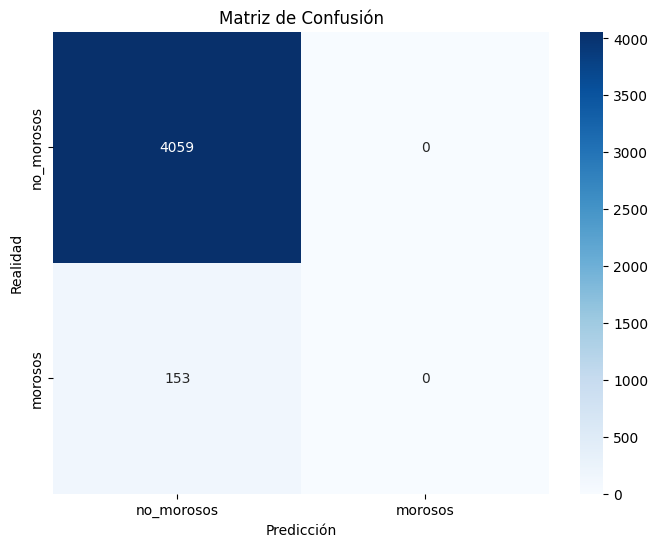

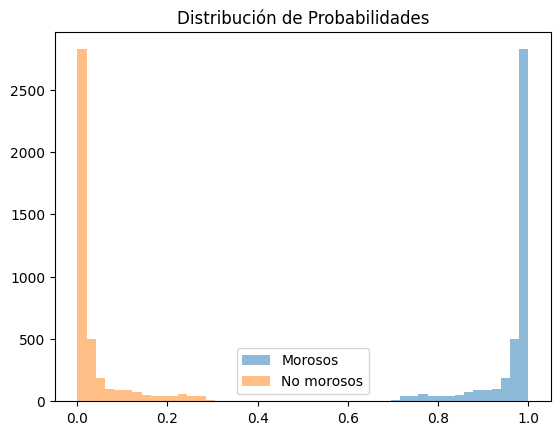

id_x: -0.7443
cash_request_id: -0.7443
id_y: -0.3672
user_id: 0.2327
amount: 0.1116
deleted_account_id: 0.0881
total_amount: -0.0128


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id_x,amount,status_x,created_at_x,updated_at_x,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,id_y,cash_request_id,type,status_y,category,total_amount,reason,created_at_y,updated_at_y,paid_at,from_date,to_date,charge_moment,days_to_reimbursement,morosidad
0,23534,25.0,money_back,2020-10-23 15:20:26.163927+00,2020-12-18 13:08:29.099365+00,21465.0,NaN,NaN,NaT,NaT,2020-11-06 07:16:21.845479+00,instant,2020-10-23 15:21:26.878525,NaN,NaN,NaN,16460,23534.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23534,2020-10-23 15:21:35.895711+00,2020-10-23 15:21:35.89574+00,2020-11-06 07:16:22.014422+00,NaN,NaN,after,NaN,0
1,2203,100.0,money_back,2020-05-27 02:26:27.61519+00,2020-06-09 11:25:51.72636+00,2109.0,2020-05-27 10:02:13.094467+00,NaN,NaT,2020-05-29,2020-07-15 22:00:00+00,regular,NaT,NaN,NaN,NaN,100,2203.0,postpone,accepted,NaN,5.0,Postpone Cash Request 2203,2020-06-09 11:25:52.449808+00,2020-10-13 14:25:00.867548+00,NaN,2020-06-15 02:26:27+00,2020-07-15 02:26:27+00,before,NaN,0
2,6098,100.0,active,2020-07-01 09:30:03.14541+00,2020-08-11 22:27:58.240406+00,23328.0,2020-07-01 16:44:53.070844+00,NaN,NaT,2020-07-03,NaN,regular,NaT,pending,2020-08-11 22:27:55.367849+00,2020-08-11 22:27:58.255621+00,3733,6098.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 6098,2020-08-13 10:58:39.63422+00,2020-10-13 14:25:16.660127+00,NaN,2020-08-03 22:00:00+00,2020-09-03 10:58:32.274+00,after,NaN,0
3,6098,100.0,active,2020-07-01 09:30:03.14541+00,2020-08-11 22:27:58.240406+00,23328.0,2020-07-01 16:44:53.070844+00,NaN,NaT,2020-07-03,NaN,regular,NaT,pending,2020-08-11 22:27:55.367849+00,2020-08-11 22:27:58.255621+00,3734,6098.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 6098,2020-08-13 10:58:52.603153+00,2020-10-13 14:25:16.661371+00,NaN,2020-08-03 22:00:00+00,2020-09-03 10:58:32.274+00,after,NaN,0
4,6098,100.0,active,2020-07-01 09:30:03.14541+00,2020-08-11 22:27:58.240406+00,23328.0,2020-07-01 16:44:53.070844+00,NaN,NaT,2020-07-03,NaN,regular,NaT,pending,2020-08-11 22:27:55.367849+00,2020-08-11 22:27:58.255621+00,3735,6098.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 6098,2020-08-13 11:00:39.879521+00,2020-10-13 14:25:16.662449+00,NaN,2020-08-03 22:00:00+00,2020-09-01 11:00:34.027+00,after,NaN,0


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datasets
cash_request_data = pd.read_csv('/kaggle/input/business-payment/extract - cash request - data analyst.csv')
fees_data = pd.read_csv('/kaggle/input/business-payment/extract - fees - data analyst - .csv')

# Convertir fechas a datetime (tz-naive)
for col in ['send_at', 'cash_request_received_date', 'reimbursement_date']:
    if col in cash_request_data.columns:
        cash_request_data[col] = pd.to_datetime(cash_request_data[col], errors='coerce').dt.tz_localize(None)

# Unir datasets
if 'id' in cash_request_data.columns and 'cash_request_id' in fees_data.columns:
    merged_data = pd.merge(cash_request_data, fees_data, left_on='id', right_on='cash_request_id', how='inner')

# Manejar columnas de fechas
if 'reimbursement_date' in merged_data.columns and 'cash_request_received_date' in merged_data.columns:
    merged_data['reimbursement_date'] = pd.to_datetime(merged_data['reimbursement_date'], errors='coerce').dt.tz_localize(None)
    merged_data['cash_request_received_date'] = pd.to_datetime(merged_data['cash_request_received_date'], errors='coerce').dt.tz_localize(None)
    merged_data['days_to_reimbursement'] = (merged_data['reimbursement_date'] - merged_data['cash_request_received_date']).dt.days
    merged_data['morosidad'] = (merged_data['days_to_reimbursement'] > 30).astype(int)

# Seleccionar solo columnas numéricas para imputar
numeric_data = merged_data.select_dtypes(include=[np.number])

# Imputar valores nulos con la media
imputer = SimpleImputer(strategy='mean')
numeric_data_imputed = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_data.columns)

# Normalizar y dividir datos
scaler = StandardScaler()
y = numeric_data_imputed['morosidad']
X = numeric_data_imputed.drop(columns=['morosidad', 'days_to_reimbursement'], errors='ignore')
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
clf = LogisticRegression(solver="liblinear")
clf.fit(X_train, y_train)

# Evaluación
predicciones = clf.predict(X_test)
predicciones_prob = clf.predict_proba(X_test)

# Mostrar precisión y reporte de clasificación
print("Accuracy:", clf.score(X_test, y_test))
print("Classification Report:\n", classification_report(y_test, predicciones))

# Matriz de confusión con etiquetas personalizadas
matriz_confusion = confusion_matrix(y_test, predicciones)
columnas = ['no_morosos', 'morosos']
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=columnas, yticklabels=columnas)
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.title('Matriz de Confusión')
plt.show()

# Visualización de probabilidades y coeficientes
plt.hist(predicciones_prob[:, 0], bins=20, alpha=0.5, label='Morosos')
plt.hist(predicciones_prob[:, 1], bins=20, alpha=0.5, label='No morosos')
plt.title('Distribución de Probabilidades')
plt.legend()
plt.show()
coeficientes = sorted(zip(X.columns, clf.coef_[0]), key=lambda x: abs(x[1]), reverse=True)
for feature, coef in coeficientes:
    print(f"{feature}: {coef:.4f}")

display(merged_data.head())

Precisión del modelo: 0.9668

Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      4059
         1.0       0.54      0.56      0.55       153

    accuracy                           0.97      4212
   macro avg       0.76      0.77      0.77      4212
weighted avg       0.97      0.97      0.97      4212



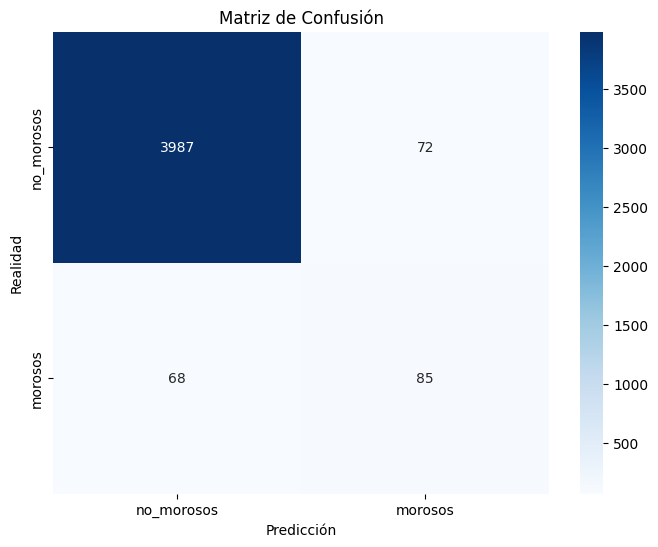

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datasets y preprocesar (mismo proceso anterior)
# ... [Código de carga, unión, fechas, imputación, normalización, como ya implementado anteriormente] ...

# Crear y entrenar modelo de Árbol de Decisión
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

# Predicciones y evaluación
predictions = DT.predict(X_test)
print(f"Precisión del modelo: {DT.score(X_test, y_test):.4f}")
print("\nReporte de clasificación:\n", classification_report(y_test, predictions))

# Importancia de las características
#feature_names = X.columns
#feature_importances = DT.feature_importances_
#feature_importance = sorted(zip(feature_names, feature_importances), key=lambda x: abs(x[1]), reverse=True)

#print("\nImportancia de las características (ordenadas por magnitud):")
#for feature, importance in feature_importance:
    #print(f"{feature}: {importance:.4f}")

# Gráfico de importancias
#plt.figure(figsize=(10, 6))
#features = [f[0] for f in feature_importance[::-1]]
#importances = [f[1] for f in feature_importance[::-1]]
#plt.barh(features, importances, color='lightblue')
#plt.xlabel("Importancia")
#plt.title("Importancia de las Características en el Modelo de Árbol de Decisión")
#plt.show()

# Matriz de confusión
columnas = ['no_morosos', 'morosos']
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues', xticklabels=columnas, yticklabels=columnas)
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.title("Matriz de Confusión")
plt.show()


<ipython-input-23-8be39a9c3899>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  deuda_promedio = merged_data.groupby('rango_morosidad')['days_to_reimbursement'].mean()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/

Deuda promedio por rango:
 rango_morosidad
0-30 días       14.981988
31-90 días      54.847914
91-180 días     96.885714
181-365 días          NaN
Name: days_to_reimbursement, dtype: float64
Precisión Logística: 0.9636752136752137
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      4059
         1.0       0.00      0.00      0.00       153

    accuracy                           0.96      4212
   macro avg       0.48      0.50      0.49      4212
weighted avg       0.93      0.96      0.95      4212

Precisión Árbol: 0.9677113010446344
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      4059
         1.0       0.56      0.55      0.55       153

    accuracy                           0.97      4212
   macro avg       0.77      0.77      0.77      4212
weighted avg       0.97      0.97      0.97      4212



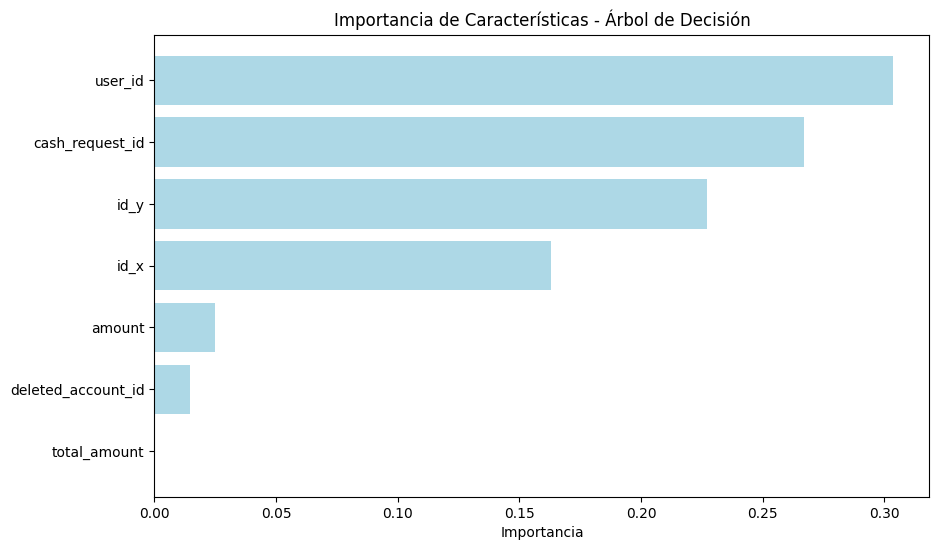

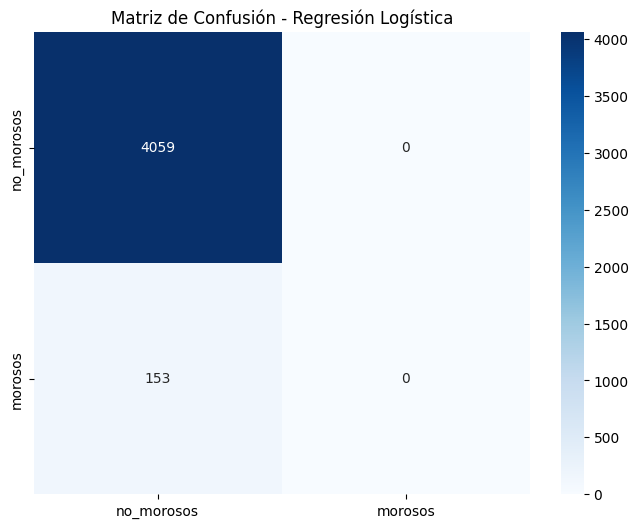

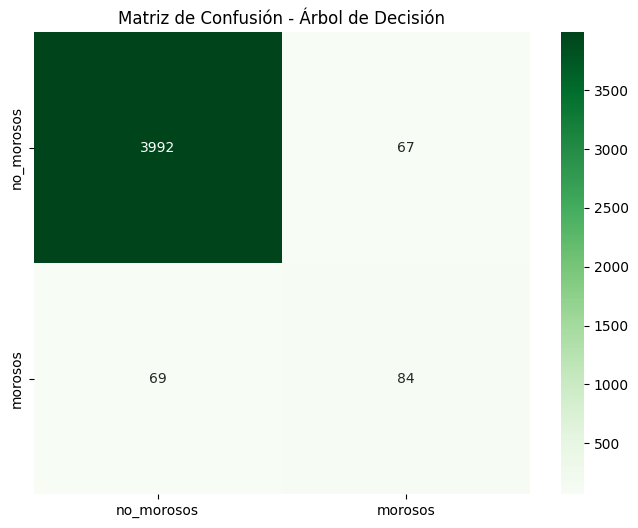

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar y unir datasets, manejar fechas, calcular morosidad con rangos (código adaptado del usuario)
# ... [Carga, unión y limpieza de datos como en el código anterior] ...

# Calcular rangos de morosidad
bins = [0, 30, 90, 180, 365]
labels = ['0-30 días', '31-90 días', '91-180 días', '181-365 días']
merged_data['rango_morosidad'] = pd.cut(merged_data['days_to_reimbursement'], bins=bins, labels=labels, right=False)

# Calcular deuda promedio por rango
deuda_promedio = merged_data.groupby('rango_morosidad')['days_to_reimbursement'].mean()
print("Deuda promedio por rango:\n", deuda_promedio)

# Preprocesar datos
numeric_data = merged_data.select_dtypes(include=[np.number])
imputer = SimpleImputer(strategy='mean')
numeric_data = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_data.columns)
scaler = StandardScaler()
y = numeric_data['morosidad']
X = numeric_data.drop(columns=['morosidad', 'days_to_reimbursement'], errors='ignore')
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

# Modelo de Regresión Logística
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression(solver="liblinear")
clf.fit(X_train, y_train)
predictions_log = clf.predict(X_test)
print("Precisión Logística:", clf.score(X_test, y_test))
print(classification_report(y_test, predictions_log))

# Modelo de Árbol de Decisión
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
predictions_tree = DT.predict(X_test)
print("Precisión Árbol:", DT.score(X_test, y_test))
print(classification_report(y_test, predictions_tree))

# Importancia de características para Árbol de Decisión
importances = DT.feature_importances_
feature_importance = sorted(zip(X.columns, importances), key=lambda x: abs(x[1]), reverse=True)
plt.figure(figsize=(10, 6))
plt.barh([f[0] for f in feature_importance[::-1]], [f[1] for f in feature_importance[::-1]], color='lightblue')
plt.xlabel("Importancia")
plt.title("Importancia de Características - Árbol de Decisión")
plt.show()

# Matrices de Confusión con etiquetas
columnas = ['no_morosos', 'morosos']
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, predictions_log), annot=True, fmt='d', cmap='Blues', xticklabels=columnas, yticklabels=columnas)
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, predictions_tree), annot=True, fmt='d', cmap='Greens', xticklabels=columnas, yticklabels=columnas)
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.show()
